In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Show plots inline (if not already set)
%matplotlib inline

# Point to enriched_markets.csv (assuming notebook is at project root)
base_dir = Path("..")
markets_path = base_dir / "data" / "enriched_markets.csv"
print("Markets CSV path:", markets_path.resolve())

# Load markets data
markets_df = pd.read_csv(markets_path)

# Basic sanity check
print("markets_df shape:", markets_df.shape)
markets_df.head()


Markets CSV path: C:\Users\Adam Nhan\prediction-market-money-printer\data\enriched_markets.csv
markets_df shape: (1000, 14)


,ticker,event_ticker,category,normalized_status,status,close_time,volume,last_price,result,settlement_value,title,category_event,series_ticker,event_time
0,KXBTCD-25NOV1017-T99999.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,184,96,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z
1,KXBTCD-25NOV1017-T99499.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,32,86,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z
2,KXBTCD-25NOV1017-T98999.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,8,72,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z
3,KXBTCD-25NOV1017-T98499.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,8,72,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z
4,KXBTCD-25NOV1017-T97999.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,8,72,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z


In [29]:
# Keep only Crypto category
crypto_df = markets_df[markets_df["category"] == "Crypto"].copy()
print("Crypto markets:", crypto_df.shape[0])

# Check result distribution
print("\nResult counts:")
print(crypto_df["result"].value_counts(dropna=False))

crypto_df.head()


Crypto markets: 1000

Result counts:
result
no     621
yes    379
Name: count, dtype: int64


,ticker,event_ticker,category,normalized_status,status,close_time,volume,last_price,result,settlement_value,title,category_event,series_ticker,event_time
0,KXBTCD-25NOV1017-T99999.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,184,96,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z
1,KXBTCD-25NOV1017-T99499.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,32,86,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z
2,KXBTCD-25NOV1017-T98999.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,8,72,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z
3,KXBTCD-25NOV1017-T98499.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,8,72,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z
4,KXBTCD-25NOV1017-T97999.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,8,72,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z


In [30]:
# Choose a sample ticker
sample_ticker = crypto_df.iloc[0]["ticker"]
print("Sample ticker:", sample_ticker)

# Construct path to trade file (assuming filename matches ticker)
trades_path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{sample_ticker}.csv"
print("Trade file path:", trades_path.resolve())

# Load sample trades
trades_df = pd.read_csv(trades_path, parse_dates=["created_time_dt"])
print("Trades shape:", trades_df.shape)
print("Timestamp range:", trades_df["created_time_dt"].min(), "to", trades_df["created_time_dt"].max())
trades_df.head()


Sample ticker: KXBTCD-25NOV1017-T99999.99
Trade file path: C:\Users\Adam Nhan\prediction-market-money-printer\kalshi_fetcher\data\enriched_trades\KXBTCD-25NOV1017-T99999.99.csv
Trades shape: (3, 13)
Timestamp range: 2025-11-10 04:04:10.481633+00:00 to 2025-11-10 04:10:48.879661+00:00


,ticker,created_time,price,count,taker_side,trade_id,event_ticker,category,event_time,created_time_dt,event_time_dt,seconds_before_event,minutes_before_event
0,KXBTCD-25NOV1017-T99999.99,2025-11-10T04:10:48.879661Z,0.96,152,no,ce7789b0-fa5b-71d0-2cb9-82db38a4a7e8,KXBTCD-25NOV1017,Crypto,2025-11-10T22:00:00Z,2025-11-10 04:10:48.879661+00:00,2025-11-10 22:00:00+00:00,64151.120339,1069.185339
1,KXBTCD-25NOV1017-T99999.99,2025-11-10T04:04:17.038957Z,0.86,16,yes,7d1bc6ea-bfc2-4ecc-74f4-e83c7f09e0d9,KXBTCD-25NOV1017,Crypto,2025-11-10T22:00:00Z,2025-11-10 04:04:17.038957+00:00,2025-11-10 22:00:00+00:00,64542.961043,1075.716017
2,KXBTCD-25NOV1017-T99999.99,2025-11-10T04:04:10.481633Z,0.86,16,yes,1ed15826-aa82-5ed1-2b16-088922703a4f,KXBTCD-25NOV1017,Crypto,2025-11-10T22:00:00Z,2025-11-10 04:04:10.481633+00:00,2025-11-10 22:00:00+00:00,64549.518367,1075.825306


In [31]:
import random

# Randomly sample 5 crypto tickers
sample_tickers = random.sample(list(crypto_df["ticker"]), 5)
print("Sample tickers:", sample_tickers)

for t in sample_tickers:
    path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{t}.csv"
    if path.exists():
        df = pd.read_csv(path, nrows=3)
        print(f"\n{t}: created_time dtype ->", df["created_time"].dtype)
    else:
        print(f"\n{t}: file not found")


Sample tickers: ['KXBTCD-25NOV0914-T103249.99', 'KXBTC-25NOV0909-B102125', 'KXETHD-25NOV1013-T3609.99', 'KXBTCD-25NOV0912-T103999.99', 'KXDOGED-25NOV1010-T0.1799999']

KXBTCD-25NOV0914-T103249.99: created_time dtype -> object

KXBTC-25NOV0909-B102125: created_time dtype -> object

KXETHD-25NOV1013-T3609.99: created_time dtype -> object

KXBTCD-25NOV0912-T103999.99: created_time dtype -> object

KXDOGED-25NOV1010-T0.1799999: created_time dtype -> object


In [32]:
# Test normalization on one sample file
test_ticker = sample_tickers[0]
test_path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{test_ticker}.csv"

print("Testing timestamp normalization for:", test_ticker)

df = pd.read_csv(test_path)

# Convert both time columns to datetime (errors='coerce' ensures invalid formats become NaT)
for col in ["created_time", "created_time_dt"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce", utc=True)

print(df[["created_time", "created_time_dt"]].dtypes)
print("Timestamp ranges:")
for col in ["created_time", "created_time_dt"]:
    if col in df.columns:
        print(f"{col}: {df[col].min()} to {df[col].max()}")

df.head()


Testing timestamp normalization for: KXBTCD-25NOV0914-T103249.99
created_time       datetime64[ns, UTC]
created_time_dt    datetime64[ns, UTC]
dtype: object
Timestamp ranges:
created_time: 2025-11-09 18:01:54.035931+00:00 to 2025-11-09 18:57:13.111790+00:00
created_time_dt: 2025-11-09 18:01:54.035931+00:00 to 2025-11-09 18:57:13.111790+00:00


,ticker,created_time,price,count,taker_side,trade_id,event_ticker,category,event_time,created_time_dt,event_time_dt,seconds_before_event,minutes_before_event
0,KXBTCD-25NOV0914-T103249.99,2025-11-09 18:57:13.111790+00:00,0.99,1,yes,16036fd8-b2bf-679e-7b23-170b714c6e5f,KXBTCD-25NOV0914,Crypto,2025-11-09T19:00:00Z,2025-11-09 18:57:13.111790+00:00,2025-11-09 19:00:00+00:00,166.888210,2.781470
1,KXBTCD-25NOV0914-T103249.99,2025-11-09 18:57:12.219359+00:00,0.99,1,no,3e710f0b-c9fe-7f1a-6a1d-6f9a8081b056,KXBTCD-25NOV0914,Crypto,2025-11-09T19:00:00Z,2025-11-09 18:57:12.219359+00:00,2025-11-09 19:00:00+00:00,167.780641,2.796344
2,KXBTCD-25NOV0914-T103249.99,2025-11-09 18:50:08.086087+00:00,0.99,1,yes,35c4b853-b644-6c67-c3ae-54dee7d08f92,KXBTCD-25NOV0914,Crypto,2025-11-09T19:00:00Z,2025-11-09 18:50:08.086087+00:00,2025-11-09 19:00:00+00:00,591.913913,9.865232
3,KXBTCD-25NOV0914-T103249.99,2025-11-09 18:50:07.118804+00:00,0.98,1,yes,d8eadfce-7aaf-6b73-851c-978152dde58a,KXBTCD-25NOV0914,Crypto,2025-11-09T19:00:00Z,2025-11-09 18:50:07.118804+00:00,2025-11-09 19:00:00+00:00,592.881196,9.881353
4,KXBTCD-25NOV0914-T103249.99,2025-11-09 18:50:02.119984+00:00,0.99,1,yes,26d49a42-69a7-67e5-45f1-64c9c0f5ee42,KXBTCD-25NOV0914,Crypto,2025-11-09T19:00:00Z,2025-11-09 18:50:02.119984+00:00,2025-11-09 19:00:00+00:00,597.880016,9.964667


In [33]:
valid_counts = []
sample_tickers_check = random.sample(list(crypto_df["ticker"]), 20)

for t in sample_tickers_check:
    path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{t}.csv"
    if not path.exists():
        continue
    df = pd.read_csv(path, usecols=["created_time"], nrows=10)
    df["created_time"] = pd.to_datetime(df["created_time"], errors="coerce", utc=True)
    valid_ratio = df["created_time"].notna().mean()
    valid_counts.append(valid_ratio)

print(f"Checked {len(valid_counts)} files — average valid timestamp ratio: {np.mean(valid_counts):.2f}")


Checked 20 files — average valid timestamp ratio: 1.00


In [34]:
# Pick a fresh sample ticker
sample_ticker = crypto_df.iloc[0]["ticker"]
print("Sample ticker:", sample_ticker)

trades_path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{sample_ticker}.csv"
trades_df = pd.read_csv(trades_path)

# Normalize time columns
for col in ["created_time", "created_time_dt"]:
    if col in trades_df.columns:
        trades_df[col] = pd.to_datetime(trades_df[col], errors="coerce", utc=True)

# Canonical trade_time column (prefer created_time_dt if present)
if "created_time_dt" in trades_df.columns:
    trades_df["trade_time"] = trades_df["created_time_dt"].fillna(trades_df["created_time"])
else:
    trades_df["trade_time"] = trades_df["created_time"]

print("trade_time dtype:", trades_df["trade_time"].dtype)
print("trade_time range:", trades_df["trade_time"].min(), "→", trades_df["trade_time"].max())

# Quick look at minutes_before_event vs trade_time
print(trades_df[["trade_time", "minutes_before_event"]].head())


Sample ticker: KXBTCD-25NOV1017-T99999.99
trade_time dtype: datetime64[ns, UTC]
trade_time range: 2025-11-10 04:04:10.481633+00:00 → 2025-11-10 04:10:48.879661+00:00
                        trade_time  minutes_before_event
0 2025-11-10 04:10:48.879661+00:00           1069.185339
1 2025-11-10 04:04:17.038957+00:00           1075.716017
2 2025-11-10 04:04:10.481633+00:00           1075.825306


In [35]:
# Compute simple volatility metric
volatility = trades_df["price"].std() / trades_df["price"].mean()
print(f"Volatility (std/mean): {volatility:.4f}")

# Also store a few related stats for later
price_stats = {
    "price_mean": trades_df["price"].mean(),
    "price_std": trades_df["price"].std(),
    "price_min": trades_df["price"].min(),
    "price_max": trades_df["price"].max(),
}
price_stats


Volatility (std/mean): 0.0646


{'price_mean': np.float64(0.8933333333333332),
 'price_std': 0.05773502691896257,
 'price_min': 0.86,
 'price_max': 0.96}

In [36]:
# Compute burstiness as variability of trade timing
trades_df = trades_df.sort_values("trade_time")
time_diffs = trades_df["trade_time"].diff().dt.total_seconds().dropna()

if len(time_diffs) > 1:
    burstiness = time_diffs.std() / time_diffs.mean()
else:
    burstiness = np.nan

print(f"Burstiness (std/mean of trade intervals): {burstiness:.4f}")
print("Number of trades:", len(trades_df))


Burstiness (std/mean of trade intervals): 1.3677
Number of trades: 3


In [37]:
# Encode taker side (+1 for buy, -1 for sell)
trades_df["side_sign"] = trades_df["taker_side"].map({"buy": 1, "sell": -1})

# Compute price changes between trades
trades_df["price_change"] = trades_df["price"].diff()

# Direction alignment: proportion of times side_sign * price_change > 0
mask = trades_df["price_change"].notna()
alignment = (np.sign(trades_df.loc[mask, "price_change"]) == np.sign(trades_df.loc[mask, "side_sign"])).mean()

print(f"Direction alignment: {alignment:.2f}")
trades_df[["trade_time", "price", "taker_side", "price_change", "side_sign"]]


Direction alignment: 0.00


,trade_time,price,taker_side,price_change,side_sign
2,2025-11-10 04:04:10.481633+00:00,0.86,yes,NaN,NaN
1,2025-11-10 04:04:17.038957+00:00,0.86,yes,0.0,NaN
0,2025-11-10 04:10:48.879661+00:00,0.96,no,0.1,NaN


In [38]:
# Re-encode taker_side to handle 'yes'/'no'
trades_df["side_sign"] = trades_df["taker_side"].map({"buy": 1, "sell": -1, "yes": 1, "no": -1})

# Recompute direction alignment
mask = trades_df["price_change"].notna()
alignment = (np.sign(trades_df.loc[mask, "price_change"]) == np.sign(trades_df.loc[mask, "side_sign"])).mean()

print(f"Direction alignment (after fix): {alignment:.2f}")
trades_df[["trade_time", "price", "taker_side", "price_change", "side_sign"]]


Direction alignment (after fix): 0.00


,trade_time,price,taker_side,price_change,side_sign
2,2025-11-10 04:04:10.481633+00:00,0.86,yes,NaN,1
1,2025-11-10 04:04:17.038957+00:00,0.86,yes,0.0,1
0,2025-11-10 04:10:48.879661+00:00,0.96,no,0.1,-1


In [39]:
# Sort by time (closest to event = smallest minutes_before_event)
trades_df = trades_df.sort_values("minutes_before_event", ascending=False)

# Determine cutoff for last 10% of timeline
cutoff = trades_df["minutes_before_event"].max() * 0.1
late_trades = trades_df[trades_df["minutes_before_event"] <= cutoff]

# Compute late volume concentration
late_volume_share = late_trades["count"].sum() / trades_df["count"].sum()
print(f"Late volume concentration (last 10% of time): {late_volume_share:.2f}")


Late volume concentration (last 10% of time): 0.00


In [40]:
# Collect metrics for this market
market_features = {
    "ticker": sample_ticker,
    "volatility": volatility,
    "burstiness": burstiness,
    "direction_alignment": alignment,
    "late_volume_share": late_volume_share,
    "num_trades": len(trades_df)
}

# Display neatly
pd.DataFrame([market_features])


,ticker,volatility,burstiness,direction_alignment,late_volume_share,num_trades
0,KXBTCD-25NOV1017-T99999.99,0.064629,1.36766,0.0,0.0,3


In [41]:
features = []

for i, row in crypto_df.iterrows():
    ticker = row["ticker"]
    path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{ticker}.csv"
    if not path.exists():
        continue
    
    df = pd.read_csv(path)
    if "price" not in df.columns or len(df) < 3:
        continue
    
    # Normalize times
    for col in ["created_time", "created_time_dt"]:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce", utc=True)
    df["trade_time"] = df.get("created_time_dt", df.get("created_time"))
    
    # Compute features inline
    vol = df["price"].std() / df["price"].mean() if df["price"].mean() != 0 else np.nan
    df = df.sort_values("trade_time")
    burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan
    df["side_sign"] = df["taker_side"].map({"buy": 1, "sell": -1, "yes": 1, "no": -1})
    df["price_change"] = df["price"].diff()
    mask = df["price_change"].notna()
    align = (np.sign(df.loc[mask, "price_change"]) == np.sign(df.loc[mask, "side_sign"])).mean() if mask.sum() > 0 else np.nan
    cutoff = df["minutes_before_event"].max() * 0.1 if "minutes_before_event" in df else np.nan
    late_share = df[df["minutes_before_event"] <= cutoff]["count"].sum() / df["count"].sum() if "count" in df and not df["count"].sum() == 0 else np.nan
    
    features.append({
        "ticker": ticker,
        "volatility": vol,
        "burstiness": burst,
        "direction_alignment": align,
        "late_volume_share": late_share,
        "num_trades": len(df)
    })

features_df = pd.DataFrame(features)
print("Computed features for", len(features_df), "markets")
features_df.head()


C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_39096\3340319598.py:22: RuntimeWarning: invalid value encountered in scalar divide
  burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan
C:\Users\Adam Nhan\AppData\Local\Temp\ipykernel_39096\3340319598.py:22: RuntimeWarning: invalid value encountered in scalar divide
  burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan


Computed features for 701 markets


,ticker,volatility,burstiness,direction_alignment,late_volume_share,num_trades
0,KXBTCD-25NOV1017-T99999.99,0.064629,1.367660,0.000000,0.0,3
1,KXBTCD-25NOV1017-T108999.99,0.952522,1.289114,0.666667,0.0,4
2,KXBTCD-25NOV1017-T108499.99,0.423519,1.192936,0.400000,0.0,6
3,KXBTCD-25NOV1017-T107999.99,0.741549,1.214629,0.153846,0.0,14
4,KXBTCD-25NOV1017-T107499.99,0.515830,1.389198,0.500000,0.0,9


In [42]:
# Merge features with market-level info (including result)
crypto_features_df = crypto_df.merge(features_df, on="ticker", how="inner")

print("crypto_features_df shape:", crypto_features_df.shape)
# Fraction of NaNs per column
crypto_features_df.isna().mean().sort_values(ascending=False)


crypto_features_df shape: (701, 19)


burstiness             0.002853
event_ticker           0.000000
ticker                 0.000000
category               0.000000
normalized_status      0.000000
close_time             0.000000
status                 0.000000
last_price             0.000000
result                 0.000000
settlement_value       0.000000
volume                 0.000000
title                  0.000000
category_event         0.000000
event_time             0.000000
series_ticker          0.000000
volatility             0.000000
direction_alignment    0.000000
late_volume_share      0.000000
num_trades             0.000000
dtype: float64

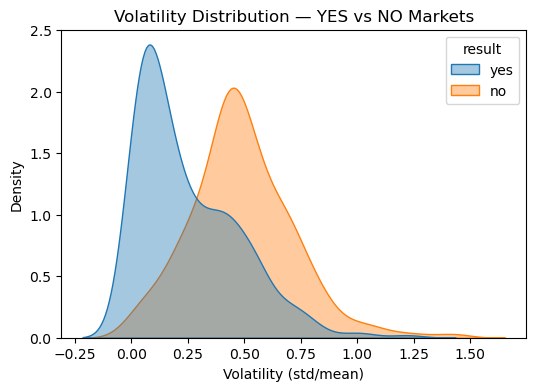

In [43]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=crypto_features_df, x="volatility", hue="result", common_norm=False, fill=True, alpha=0.4)
plt.title("Volatility Distribution — YES vs NO Markets")
plt.xlabel("Volatility (std/mean)")
plt.ylabel("Density")
plt.show()


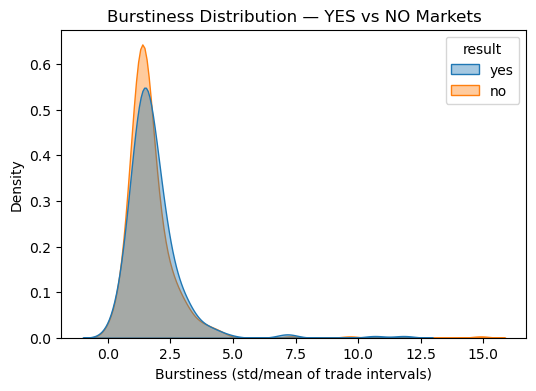

In [44]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=crypto_features_df, x="burstiness", hue="result", common_norm=False, fill=True, alpha=0.4)
plt.title("Burstiness Distribution — YES vs NO Markets")
plt.xlabel("Burstiness (std/mean of trade intervals)")
plt.ylabel("Density")
plt.show()


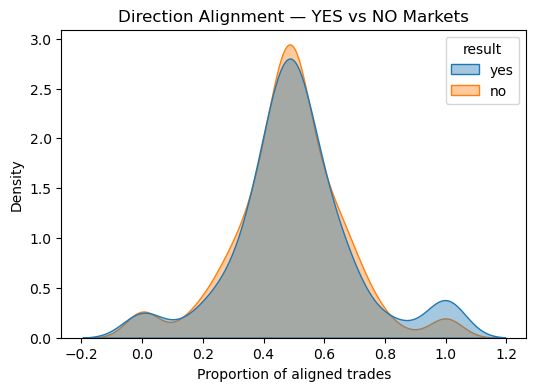

In [45]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=crypto_features_df, x="direction_alignment", hue="result", common_norm=False, fill=True, alpha=0.4)
plt.title("Direction Alignment — YES vs NO Markets")
plt.xlabel("Proportion of aligned trades")
plt.ylabel("Density")
plt.show()


In [46]:
# Compute groupwise means
feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
group_means = crypto_features_df.groupby("result")[feature_cols].mean().T
group_means["diff_yes_minus_no"] = group_means["yes"] - group_means["no"]
group_means


result,no,yes,diff_yes_minus_no
volatility,0.488586,0.248220,-0.240366
burstiness,1.681040,1.812244,0.131204
direction_alignment,0.484120,0.500980,0.016860
late_volume_share,0.091556,0.107848,0.016292
num_trades,54.902844,106.017921,51.115078


In [47]:
from sklearn.metrics import roc_auc_score

crypto_features_df["result_binary"] = (crypto_features_df["result"] == "yes").astype(int)

auc_scores = {}
for col in feature_cols:
    vals = crypto_features_df[col].fillna(0)
    auc = roc_auc_score(crypto_features_df["result_binary"], vals)
    auc_scores[col] = auc

pd.Series(auc_scores, name="AUC").sort_values(ascending=False)


num_trades             0.588260
late_volume_share      0.554664
burstiness             0.545529
direction_alignment    0.516167
volatility             0.214514
Name: AUC, dtype: float64

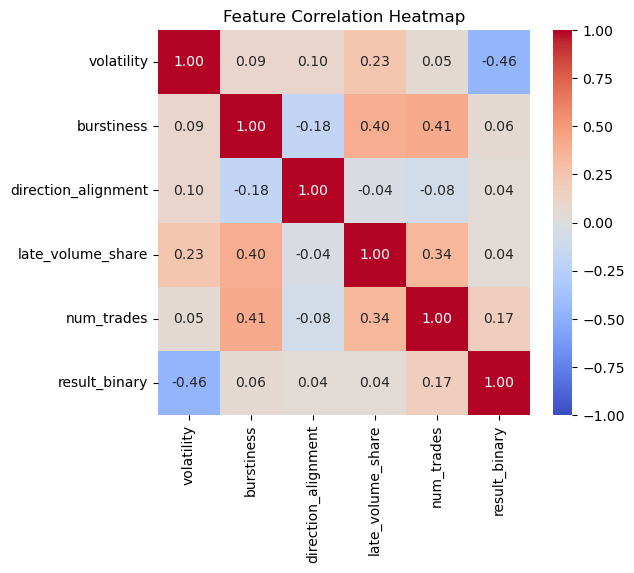

In [48]:
plt.figure(figsize=(6,5))
corr = crypto_features_df[feature_cols + ["result_binary"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

X = crypto_features_df[feature_cols].fillna(0)
y = crypto_features_df["result_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds > 0.5).astype(int))

print(f"AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=feature_cols, name="coef")


AUC: 0.811, Accuracy: 0.773


volatility            -4.796941
burstiness            -0.005865
direction_alignment    1.005992
late_volume_share      0.928927
num_trades             0.003240
Name: coef, dtype: float64

In [50]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import roc_auc_score, accuracy_score

X = crypto_features_df[feature_cols].fillna(0)
y = crypto_features_df["result_binary"]
groups = crypto_features_df["event_ticker"]

splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds > 0.5).astype(int))

print(f"GroupSplit AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=feature_cols, name="coef")


GroupSplit AUC: 0.825, Accuracy: 0.784


volatility            -4.681427
burstiness             0.005872
direction_alignment    1.091958
late_volume_share      0.921133
num_trades             0.002911
Name: coef, dtype: float64

In [51]:
from sklearn.model_selection import GroupShuffleSplit

# Combine event identifiers into one grouping key
crypto_features_df["event_group"] = (
    crypto_features_df["category_event"].astype(str) + "_" + crypto_features_df["event_time"].astype(str)
)

X = crypto_features_df[feature_cols].fillna(0)
y = crypto_features_df["result_binary"]
groups = crypto_features_df["event_group"]

splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds > 0.5).astype(int))

print(f"EventGroupSplit AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=feature_cols, name="coef")


EventGroupSplit AUC: 0.754, Accuracy: 0.729


volatility            -5.028475
burstiness             0.070812
direction_alignment    1.368481
late_volume_share      1.068874
num_trades             0.003904
Name: coef, dtype: float64

In [52]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm  # for progress bar (optional)

X = crypto_features_df[feature_cols].fillna(0)
y = crypto_features_df["result_binary"]
groups = crypto_features_df["event_group"]

cv = GroupKFold(n_splits=5)
auc_scores, acc_scores = [], []

for train_idx, test_idx in tqdm(cv.split(X, y, groups=groups), total=5):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, preds)
    acc = accuracy_score(y_test, (preds > 0.5).astype(int))

    auc_scores.append(auc)
    acc_scores.append(acc)

print(f"Mean AUC: {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")
print(f"Mean Accuracy: {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")


100%|██████████| 5/5 [00:00<00:00, 26.48it/s]

Mean AUC: 0.822 ± 0.048
Mean Accuracy: 0.787 ± 0.047


In [53]:
# Ensure event_time is in datetime format
crypto_features_df["event_time"] = pd.to_datetime(crypto_features_df["event_time"], errors="coerce")

# Sort by time
crypto_sorted = crypto_features_df.sort_values("event_time")

# Chronological split index (70% train, 30% test)
split_idx = int(len(crypto_sorted) * 0.7)

train_df = crypto_sorted.iloc[:split_idx]
test_df = crypto_sorted.iloc[split_idx:]

X_train = train_df[feature_cols].fillna(0)
y_train = (train_df["result"] == "yes").astype(int)
X_test = test_df[feature_cols].fillna(0)
y_test = (test_df["result"] == "yes").astype(int)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds > 0.5).astype(int))

print(f"Chronological Split AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=feature_cols, name="coef")


Chronological Split AUC: 0.816, Accuracy: 0.791


volatility            -4.470044
burstiness             0.080301
direction_alignment    0.950084
late_volume_share      0.646835
num_trades             0.003986
Name: coef, dtype: float64

In [54]:
cutoff_minutes = 60
features_cut = []

for i, row in crypto_df.iterrows():
    ticker = row["ticker"]
    path = base_dir / "kalshi_fetcher" / "data" / "enriched_trades" / f"{ticker}.csv"
    if not path.exists():
        continue

    df = pd.read_csv(path)
    if "price" not in df.columns or "minutes_before_event" not in df.columns:
        continue

    # keep only trades more than 60 minutes before event
    df = df[df["minutes_before_event"] >= cutoff_minutes]
    if len(df) < 3:
        continue

    # normalize times
    for col in ["created_time", "created_time_dt"]:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce", utc=True)
    df["trade_time"] = df.get("created_time_dt", df.get("created_time"))

    # compute features
    vol = df["price"].std() / df["price"].mean() if df["price"].mean() != 0 else np.nan
    df = df.sort_values("trade_time")
    burst = df["trade_time"].diff().dt.total_seconds().std() / df["trade_time"].diff().dt.total_seconds().mean() if len(df) > 2 else np.nan
    df["side_sign"] = df["taker_side"].map({"buy": 1, "sell": -1, "yes": 1, "no": -1})
    df["price_change"] = df["price"].diff()
    mask = df["price_change"].notna()
    align = (np.sign(df.loc[mask, "price_change"]) == np.sign(df.loc[mask, "side_sign"])).mean() if mask.sum() > 0 else np.nan
    late_share = np.nan  # skip late volume (irrelevant when filtering early)
    
    features_cut.append({
        "ticker": ticker,
        "volatility": vol,
        "burstiness": burst,
        "direction_alignment": align,
        "num_trades": len(df)
    })

features_cut_df = pd.DataFrame(features_cut)
print("Computed early-trade features for", len(features_cut_df), "markets")
features_cut_df.head()


Computed early-trade features for 77 markets


,ticker,volatility,burstiness,direction_alignment,num_trades
0,KXBTCD-25NOV1017-T99999.99,0.064629,1.367660,0.000000,3
1,KXBTCD-25NOV1017-T108999.99,0.952522,1.289114,0.666667,4
2,KXBTCD-25NOV1017-T108499.99,0.423519,1.192936,0.400000,6
3,KXBTCD-25NOV1017-T107999.99,0.741549,1.214629,0.153846,14
4,KXBTCD-25NOV1017-T107499.99,0.515830,1.389198,0.500000,9


In [55]:
# Merge early features with market info
crypto_early_df = crypto_df.merge(features_cut_df, on="ticker", how="inner")

print("crypto_early_df shape:", crypto_early_df.shape)
print("\nResult counts (early-trade subset):")
print(crypto_early_df["result"].value_counts())

crypto_early_df.head()


crypto_early_df shape: (77, 18)

Result counts (early-trade subset):
result
yes    39
no     38
Name: count, dtype: int64


,ticker,event_ticker,category,normalized_status,status,close_time,volume,last_price,result,settlement_value,title,category_event,series_ticker,event_time,volatility,burstiness,direction_alignment,num_trades
0,KXBTCD-25NOV1017-T99999.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,184,96,yes,100,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z,0.064629,1.367660,0.000000,3
1,KXBTCD-25NOV1017-T108999.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,245,1,no,0,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z,0.952522,1.289114,0.666667,4
2,KXBTCD-25NOV1017-T108499.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,1257,3,no,0,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z,0.423519,1.192936,0.400000,6
3,KXBTCD-25NOV1017-T107999.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,1450,4,no,0,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z,0.741549,1.214629,0.153846,14
4,KXBTCD-25NOV1017-T107499.99,KXBTCD-25NOV1017,Crypto,settled,finalized,2025-11-10T22:00:00Z,2638,7,no,0,"Bitcoin price on Nov 10, 2025 at 5pm EST?",Crypto,KXBTCD,2025-11-10T22:00:00Z,0.515830,1.389198,0.500000,9


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

X_early = crypto_early_df[["volatility", "burstiness", "direction_alignment", "num_trades"]].fillna(0)
y_early = (crypto_early_df["result"] == "yes").astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_early, y_early, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, preds)
acc = accuracy_score(y_test, (preds>0.5).astype(int))

print(f"Early-Trade Split AUC: {auc:.3f}, Accuracy: {acc:.3f}")
pd.Series(model.coef_[0], index=X_early.columns, name="coef")


Early-Trade Split AUC: 0.693, Accuracy: 0.625


volatility            -1.630492
burstiness            -0.441878
direction_alignment   -0.562901
num_trades            -0.000502
Name: coef, dtype: float64

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# 1) Chronological split (same as before)
crypto_features_df["event_time"] = pd.to_datetime(crypto_features_df["event_time"], errors="coerce")
crypto_sorted = crypto_features_df.sort_values("event_time")

feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
X_all = crypto_sorted[feature_cols].fillna(0)
y_all = (crypto_sorted["result"] == "yes").astype(int)

split_idx = int(len(crypto_sorted) * 0.7)
train_df, test_df = crypto_sorted.iloc[:split_idx], crypto_sorted.iloc[split_idx:]
X_train, y_train = X_all.iloc[:split_idx], y_all.iloc[:split_idx]
X_test, y_test   = X_all.iloc[split_idx:], y_all.iloc[split_idx:]

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 2) Predictions + market price
test_df = test_df.copy()
test_df["p_model"] = model.predict_proba(X_test)[:, 1]
test_df["p_mkt"] = test_df["last_price"] / 100.0  # implied prob from last price

# 3) Simple trading rule: trade only when model edge > 5%
edge = test_df["p_model"] - test_df["p_mkt"]
threshold = 0.05
test_df["position"] = 0  # +1 = long YES, -1 = short YES
test_df.loc[edge >  threshold, "position"] = 1
test_df.loc[edge < -threshold, "position"] = -1

# 4) PnL per market: position * (payoff_yes - price)
payoff_yes = (test_df["result"] == "yes").astype(float)
price = test_df["p_mkt"]
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

# 5) Summary stats
trades = test_df[test_df["position"] != 0]
total_trades = len(trades)
total_pnl = trades["pnl"].sum()
avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
hit_rate = ( (trades["pnl"] > 0).sum() / total_trades ) if total_trades > 0 else 0.0

print(f"Threshold: {threshold:.2f}")
print(f"Total trades: {total_trades}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl:.4f}")
print(f"Hit rate: {hit_rate:.3f}")

trades[["ticker", "result", "last_price", "p_mkt", "p_model", "position", "pnl"]].head()


Threshold: 0.05
Total trades: 196
Total PnL: -2.040
Avg PnL per trade: -0.0104
Hit rate: 0.077


,ticker,result,last_price,p_mkt,p_model,position,pnl
363,KXDOGE-25NOV1014-B0.182,no,9,0.09,0.257986,1,-0.09
84,KXBTCD-25NOV1014-T105749.99,no,1,0.01,0.828833,1,-0.01
358,KXDOGED-25NOV1014-T0.1799999,no,28,0.28,0.602190,1,-0.28
85,KXBTCD-25NOV1014-T105499.99,yes,99,0.99,0.876018,-1,-0.01
87,KXBTCD-25NOV1014-T104999.99,yes,99,0.99,0.687893,-1,-0.01


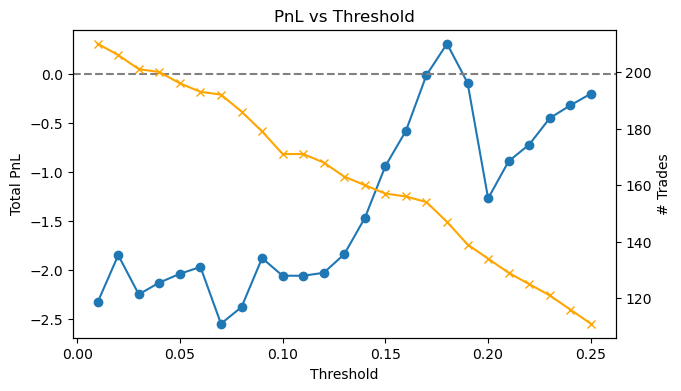

,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.01,210,-2.33,-0.011095,0.076190
1,0.02,206,-1.85,-0.008981,0.077670
2,0.03,201,-2.25,-0.011194,0.074627
3,0.04,200,-2.13,-0.010650,0.075000
4,0.05,196,-2.04,-0.010408,0.076531
5,0.06,193,-1.97,-0.010207,0.077720
6,0.07,192,-2.55,-0.013281,0.072917
7,0.08,186,-2.38,-0.012796,0.069892
8,0.09,179,-1.88,-0.010503,0.067039
9,0.10,171,-2.06,-0.012047,0.058480


In [58]:
thresholds = np.linspace(0.01, 0.25, 25)
results = []

for t in thresholds:
    pos = np.zeros(len(test_df))
    pos[test_df["p_model"] - test_df["p_mkt"] >  t] = 1
    pos[test_df["p_model"] - test_df["p_mkt"] < -t] = -1
    pnl = pos * ((test_df["result"] == "yes").astype(float) - test_df["p_mkt"])
    trades = pnl[pos != 0]
    total_trades = len(trades)
    total_pnl = trades.sum()
    avg_pnl = trades.mean() if total_trades > 0 else 0
    hit_rate = (trades > 0).mean() if total_trades > 0 else 0
    results.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_df = pd.DataFrame(results, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])

fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()
ax1.plot(results_df["threshold"], results_df["total_pnl"], label="Total PnL", marker="o")
ax2.plot(results_df["threshold"], results_df["trades"], label="# Trades", color="orange", marker="x")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Total PnL")
ax2.set_ylabel("# Trades")
ax1.axhline(0, color="gray", linestyle="--")
plt.title("PnL vs Threshold")
plt.show()

results_df.head(10)


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.11,171,-2.06,-0.0120,0.0585
1,0.12,168,-2.03,-0.0121,0.0595
2,0.13,163,-1.84,-0.0113,0.0613
3,0.14,160,-1.47,-0.0092,0.0625
4,0.15,157,-0.94,-0.0060,0.0637
5,0.16,156,-0.58,-0.0037,0.0641
6,0.17,154,-0.01,-0.0001,0.0649
7,0.18,147,0.31,0.0021,0.0680
8,0.19,139,-0.09,-0.0006,0.0647
9,0.20,134,-1.27,-0.0095,0.0522


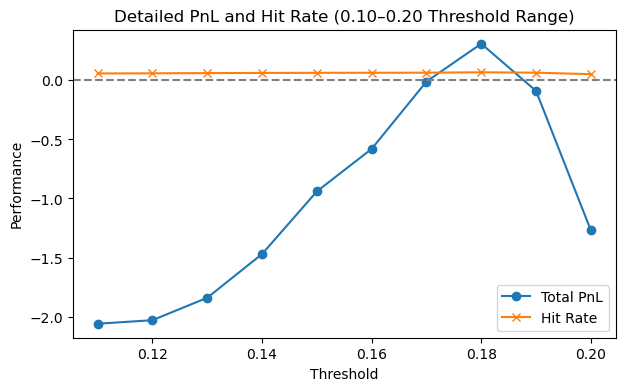

In [59]:
zoom_df = results_df[(results_df["threshold"] >= 0.10) & (results_df["threshold"] <= 0.20)]
zoom_df = zoom_df.sort_values("threshold").reset_index(drop=True)

display(zoom_df[["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"]].round(4))

plt.figure(figsize=(7,4))
plt.plot(zoom_df["threshold"], zoom_df["total_pnl"], label="Total PnL", marker="o")
plt.plot(zoom_df["threshold"], zoom_df["hit_rate"], label="Hit Rate", marker="x")
plt.xlabel("Threshold")
plt.ylabel("Performance")
plt.title("Detailed PnL and Hit Rate (0.10–0.20 Threshold Range)")
plt.axhline(0, color="gray", linestyle="--")
plt.legend()
plt.show()


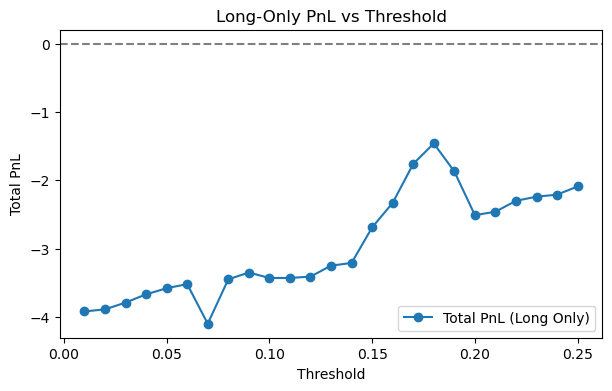

,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.01,122,-3.92,-0.032131,0.040984
1,0.02,119,-3.89,-0.032689,0.042017
2,0.03,116,-3.79,-0.032672,0.043103
3,0.04,115,-3.67,-0.031913,0.043478
4,0.05,111,-3.58,-0.032252,0.045045
5,0.06,109,-3.52,-0.032294,0.045872
6,0.07,108,-4.10,-0.037963,0.037037
7,0.08,105,-3.45,-0.032857,0.038095
8,0.09,101,-3.35,-0.033168,0.039604
9,0.10,95,-3.43,-0.036105,0.031579


In [60]:
thresholds = np.linspace(0.01, 0.25, 25)
results_long = []

for t in thresholds:
    pos = np.zeros(len(test_df))
    pos[test_df["p_model"] - test_df["p_mkt"] > t] = 1  # long YES only
    pnl = pos * ((test_df["result"] == "yes").astype(float) - test_df["p_mkt"])
    trades = pnl[pos != 0]
    total_trades = len(trades)
    total_pnl = trades.sum()
    avg_pnl = trades.mean() if total_trades > 0 else 0
    hit_rate = (trades > 0).mean() if total_trades > 0 else 0
    results_long.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_long_df = pd.DataFrame(results_long, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])

plt.figure(figsize=(7,4))
plt.plot(results_long_df["threshold"], results_long_df["total_pnl"], label="Total PnL (Long Only)", marker="o")
plt.xlabel("Threshold")
plt.ylabel("Total PnL")
plt.title("Long-Only PnL vs Threshold")
plt.axhline(0, color="gray", linestyle="--")
plt.legend()
plt.show()

results_long_df.head(10)


,YES,NO,Diff (YES–NO)
volatility,0.2482,0.4886,-0.2404
burstiness,1.8122,1.6810,0.1312
direction_alignment,0.5010,0.4841,0.0169
late_volume_share,0.1078,0.0916,0.0163
num_trades,106.0179,54.9028,51.1151


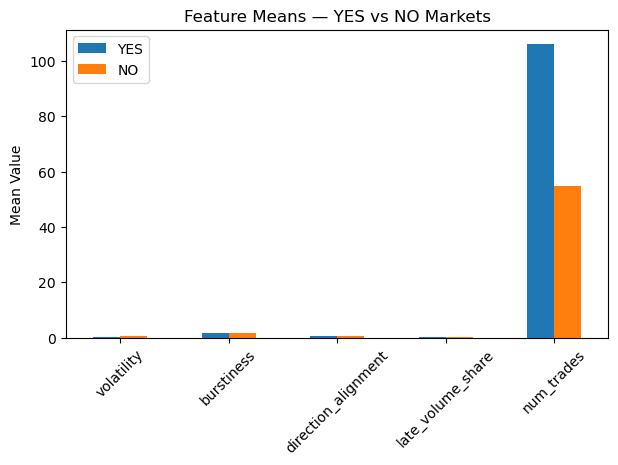

In [61]:
feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]

mean_yes = crypto_features_df[crypto_features_df["result"] == "yes"][feature_cols].mean()
mean_no  = crypto_features_df[crypto_features_df["result"] == "no"][feature_cols].mean()

compare_df = pd.DataFrame({
    "YES": mean_yes,
    "NO": mean_no,
    "Diff (YES–NO)": mean_yes - mean_no
}).round(4)

display(compare_df)

# Plot
compare_df[["YES", "NO"]].plot(kind="bar", figsize=(7,4))
plt.title("Feature Means — YES vs NO Markets")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()


In [62]:
threshold_high = 0.15
threshold_low  = 0.05

test_df["position"] = 0
edge = test_df["p_model"] - test_df["p_mkt"]

# Strong conviction: go against market
test_df.loc[edge >  threshold_high, "position"] = 1     # long YES
test_df.loc[edge < -threshold_high, "position"] = -1    # short YES

# Weak conviction: go with market (momentum)
test_df.loc[(edge <= threshold_low) & (edge > 0),  "position"] = -1  # crowd bearish → short
test_df.loc[(edge >= -threshold_low) & (edge < 0), "position"] = 1   # crowd bullish → long

payoff_yes = (test_df["result"] == "yes").astype(float)
price = test_df["p_mkt"]
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

trades = test_df[test_df["position"] != 0]
print(f"Total trades: {len(trades)} | Total PnL: {trades.pnl.sum():.3f} | Avg per trade: {trades.pnl.mean():.4f} | Hit rate: {(trades.pnl>0).mean():.3f}")


Total trades: 172 | Total PnL: -0.600 | Avg per trade: -0.0035 | Hit rate: 0.140


In [63]:
from sklearn.calibration import CalibratedClassifierCV

# 1️⃣ Refit your base model with Platt scaling
base_model = LogisticRegression(max_iter=1000)
cal_model = CalibratedClassifierCV(base_model, cv=5, method="sigmoid")
cal_model.fit(X_train, y_train)

# 2️⃣ Generate calibrated probabilities
test_df = test_df.copy()
test_df["p_model_cal"] = cal_model.predict_proba(X_test)[:, 1]
test_df["p_mkt"] = test_df["last_price"] / 100.0

# 3️⃣ Apply the same hybrid trading logic with calibrated probs
threshold_high = 0.15
threshold_low  = 0.05

edge_cal = test_df["p_model_cal"] - test_df["p_mkt"]
test_df["position"] = 0

# strong conviction → trade against market
test_df.loc[edge_cal >  threshold_high, "position"] = 1
test_df.loc[edge_cal < -threshold_high, "position"] = -1

# weak conviction → trade with market
test_df.loc[(edge_cal <= threshold_low) & (edge_cal > 0),  "position"] = -1
test_df.loc[(edge_cal >= -threshold_low) & (edge_cal < 0), "position"] = 1

# 4️⃣ Compute PnL again
payoff_yes = (test_df["result"] == "yes").astype(float)
price = test_df["p_mkt"]
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

trades = test_df[test_df["position"] != 0]
print(f"Calibrated Hybrid Strategy:")
print(f"Total trades: {len(trades)}")
print(f"Total PnL: {trades.pnl.sum():.3f}")
print(f"Avg per trade: {trades.pnl.mean():.4f}")
print(f"Hit rate: {(trades.pnl > 0).mean():.3f}")


Calibrated Hybrid Strategy:
Total trades: 169
Total PnL: -0.100
Avg per trade: -0.0006
Hit rate: 0.160


In [64]:
high_thresholds = np.linspace(0.10, 0.25, 16)
results_cal = []

for th in high_thresholds:
    edge_cal = test_df["p_model_cal"] - test_df["p_mkt"]
    pos = np.zeros(len(test_df))

    # strong conviction → against market
    pos[edge_cal >  th]  = 1
    pos[edge_cal < -th]  = -1

    # weak conviction → with market (keep low band fixed)
    low = 0.05
    pos[(edge_cal <= low) & (edge_cal > 0)]   = -1
    pos[(edge_cal >= -low) & (edge_cal < 0)]  = 1

    pnl = pos * ((test_df["result"] == "yes").astype(float) - test_df["p_mkt"])
    trades = pnl[pos != 0]

    results_cal.append([
        th,
        len(trades),
        trades.sum(),
        trades.mean() if len(trades) > 0 else 0,
        (trades > 0).mean() if len(trades) > 0 else 0
    ])

results_cal_df = pd.DataFrame(results_cal, columns=["high_threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
display(results_cal_df.round(4))


,high_threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.10,189,-1.02,-0.0054,0.1481
1,0.11,184,-0.83,-0.0045,0.1522
2,0.12,180,-1.22,-0.0068,0.1500
3,0.13,176,-0.51,-0.0029,0.1534
4,0.14,174,-0.40,-0.0023,0.1552
5,0.15,169,-0.10,-0.0006,0.1598
6,0.16,165,0.11,0.0007,0.1636
7,0.17,159,-0.48,-0.0030,0.1635
8,0.18,154,0.09,0.0006,0.1688
9,0.19,148,0.77,0.0052,0.1757


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Train Random Forest on the same features & split
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluate
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_acc = accuracy_score(y_test, (rf_probs > 0.5).astype(int))

print(f"Random Forest AUC: {rf_auc:.3f}, Accuracy: {rf_acc:.3f}")

# Feature importances
rf_importances = pd.Series(rf.feature_importances_, index=feature_cols, name="rf_importance").sort_values(ascending=False)
rf_importances


Random Forest AUC: 0.839, Accuracy: 0.773


volatility             0.566727
num_trades             0.149799
direction_alignment    0.096315
late_volume_share      0.094990
burstiness             0.092169
Name: rf_importance, dtype: float64

In [66]:
# Rebuild test_df from the chronological split to be safe
crypto_features_df["event_time"] = pd.to_datetime(crypto_features_df["event_time"], errors="coerce")
crypto_sorted = crypto_features_df.sort_values("event_time")

feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
X_all = crypto_sorted[feature_cols].fillna(0)
y_all = (crypto_sorted["result"] == "yes").astype(int)

split_idx = int(len(crypto_sorted) * 0.7)
train_df, test_df = crypto_sorted.iloc[:split_idx], crypto_sorted.iloc[split_idx:]
X_train, X_test = X_all.iloc[:split_idx], X_all.iloc[split_idx:]
y_train, y_test = y_all.iloc[:split_idx], y_all.iloc[split_idx:]

# Refit RF on this split (just to be consistent)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# RF probabilities + market implied probs
test_df = test_df.copy()
test_df["p_model_rf"] = rf.predict_proba(X_test)[:, 1]
test_df["p_mkt"] = test_df["last_price"] / 100.0

# Symmetric contrarian strategy with RF
edge = test_df["p_model_rf"] - test_df["p_mkt"]
threshold = 0.05

test_df["position"] = 0
test_df.loc[edge >  threshold, "position"] = 1    # long YES
test_df.loc[edge < -threshold, "position"] = -1   # short YES

payoff_yes = (test_df["result"] == "yes").astype(float)
price = test_df["p_mkt"]
test_df["pnl"] = test_df["position"] * (payoff_yes - price)

trades = test_df[test_df["position"] != 0]
total_trades = len(trades)
total_pnl = trades["pnl"].sum()
avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

print(f"RF Threshold: {threshold:.2f}")
print(f"Total trades: {total_trades}")
print(f"Total PnL: {total_pnl:.3f}")
print(f"Avg PnL per trade: {avg_pnl:.4f}")
print(f"Hit rate: {hit_rate:.3f}")

trades[["ticker", "result", "last_price", "p_mkt", "p_model_rf", "position", "pnl"]].head()


RF Threshold: 0.05
Total trades: 178
Total PnL: -1.110
Avg PnL per trade: -0.0062
Hit rate: 0.096


,ticker,result,last_price,p_mkt,p_model_rf,position,pnl
84,KXBTCD-25NOV1014-T105749.99,no,1,0.01,0.675021,1,-0.01
358,KXDOGED-25NOV1014-T0.1799999,no,28,0.28,0.670199,1,-0.28
85,KXBTCD-25NOV1014-T105499.99,yes,99,0.99,0.916725,-1,-0.01
87,KXBTCD-25NOV1014-T104999.99,yes,99,0.99,0.916888,-1,-0.01
88,KXBTCD-25NOV1014-T104749.99,yes,99,0.99,0.739933,-1,-0.01


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.01,205,-0.94,-0.004585,0.107317
1,0.02,200,-0.95,-0.004750,0.100000
2,0.03,196,-0.85,-0.004337,0.102041
3,0.04,189,-0.66,-0.003492,0.105820
4,0.05,178,-1.11,-0.006236,0.095506
5,0.06,173,-1.01,-0.005838,0.098266
6,0.07,165,-1.21,-0.007333,0.090909
7,0.08,160,-1.00,-0.006250,0.093750
8,0.09,155,-0.64,-0.004129,0.096774
9,0.10,148,-0.40,-0.002703,0.101351


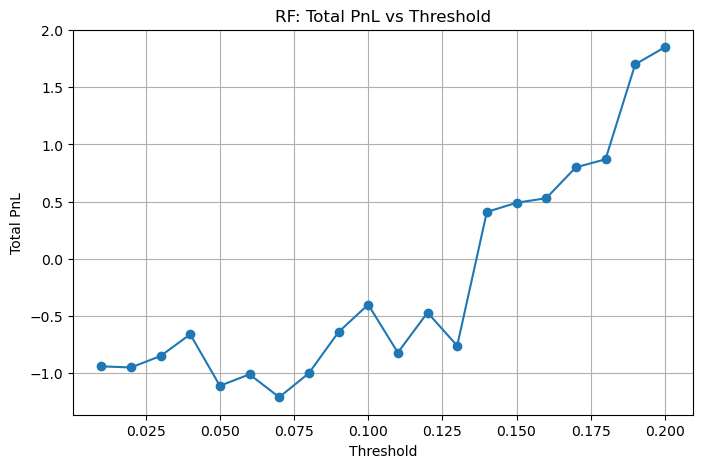

In [67]:
thresholds = np.linspace(0.01, 0.20, 20)
results = []

for t in thresholds:
    edge = test_df["p_model_rf"] - test_df["p_mkt"]
    test_df["position"] = 0
    test_df.loc[edge >  t, "position"] = 1
    test_df.loc[edge < -t, "position"] = -1

    payoff_yes = (test_df["result"] == "yes").astype(float)
    price = test_df["p_mkt"]
    test_df["pnl"] = test_df["position"] * (payoff_yes - price)

    trades = test_df[test_df["position"] != 0]
    total_trades = len(trades)
    total_pnl = trades["pnl"].sum()
    avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
    hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

    results.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_df = pd.DataFrame(results, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
display(results_df)

# Plot threshold vs PnL
plt.figure(figsize=(8,5))
plt.plot(results_df["threshold"], results_df["total_pnl"], marker='o')
plt.title("RF: Total PnL vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Total PnL")
plt.grid(True)
plt.show()


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.20,109,1.85,0.016972,0.100917
1,0.21,104,2.50,0.024038,0.105769
2,0.22,100,2.58,0.025800,0.110000
3,0.23,97,1.20,0.012371,0.092784
4,0.24,93,0.77,0.008280,0.086022
5,0.25,89,0.91,0.010225,0.089888
6,0.26,85,0.96,0.011294,0.094118
7,0.27,81,0.32,0.003951,0.086420
8,0.28,80,0.39,0.004875,0.087500
9,0.29,75,0.71,0.009467,0.093333


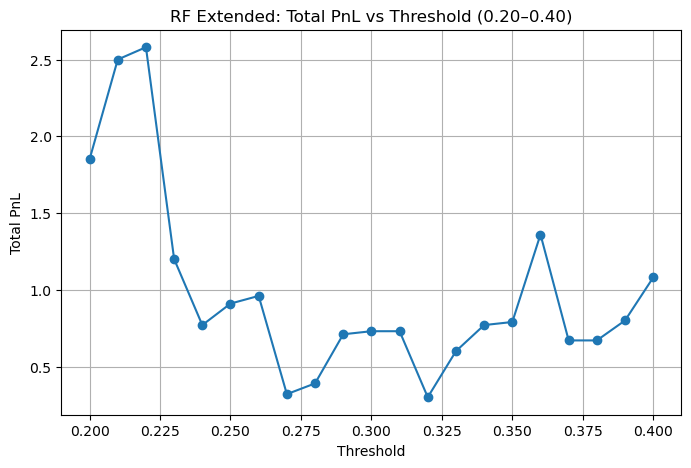

In [68]:
# Extended sweep: 0.20 to 0.40
thresholds_high = np.linspace(0.20, 0.40, 21)
results_high = []

for t in thresholds_high:
    edge = test_df["p_model_rf"] - test_df["p_mkt"]
    test_df["position"] = 0
    test_df.loc[edge >  t, "position"] = 1
    test_df.loc[edge < -t, "position"] = -1

    payoff_yes = (test_df["result"] == "yes").astype(float)
    price = test_df["p_mkt"]
    test_df["pnl"] = test_df["position"] * (payoff_yes - price)

    trades = test_df[test_df["position"] != 0]
    total_trades = len(trades)
    total_pnl = trades["pnl"].sum()
    avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
    hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

    results_high.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_high_df = pd.DataFrame(results_high, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
display(results_high_df)

# Plot results
plt.figure(figsize=(8,5))
plt.plot(results_high_df["threshold"], results_high_df["total_pnl"], marker='o')
plt.title("RF Extended: Total PnL vs Threshold (0.20–0.40)")
plt.xlabel("Threshold")
plt.ylabel("Total PnL")
plt.grid(True)
plt.show()


In [69]:
from sklearn.calibration import CalibratedClassifierCV

cal_rf = CalibratedClassifierCV(rf, method='isotonic', cv=5)
cal_rf.fit(X_train, y_train)
y_pred_cal = cal_rf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_cal)
acc = accuracy_score(y_test, (y_pred_cal > 0.5).astype(int))
print(f"Calibrated RF AUC: {auc:.3f}, Accuracy: {acc:.3f}")


Calibrated RF AUC: 0.851, Accuracy: 0.773


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.05,159,0.27,0.001698,0.125786
1,0.06,153,0.22,0.001438,0.117647
2,0.07,148,0.43,0.002905,0.121622
3,0.08,142,0.21,0.001479,0.119718
4,0.09,138,-0.17,-0.001232,0.115942
5,0.10,137,0.01,0.000073,0.116788
6,0.11,132,0.64,0.004848,0.121212
7,0.12,129,0.50,0.003876,0.116279
8,0.13,125,0.22,0.001760,0.112000
9,0.14,122,0.62,0.005082,0.114754


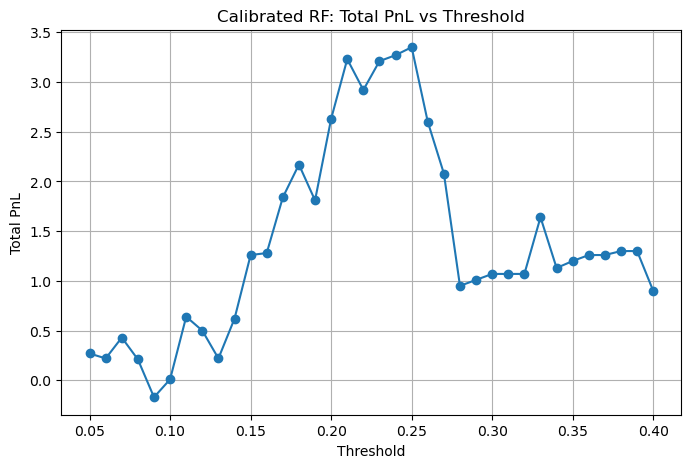

In [70]:
# Use calibrated RF predictions
test_df["p_model_rf_cal"] = y_pred_cal

thresholds = np.linspace(0.05, 0.40, 36)
results_cal = []

for t in thresholds:
    edge = test_df["p_model_rf_cal"] - test_df["p_mkt"]
    test_df["position"] = 0
    test_df.loc[edge >  t, "position"] = 1
    test_df.loc[edge < -t, "position"] = -1

    payoff_yes = (test_df["result"] == "yes").astype(float)
    price = test_df["p_mkt"]
    test_df["pnl"] = test_df["position"] * (payoff_yes - price)

    trades = test_df[test_df["position"] != 0]
    total_trades = len(trades)
    total_pnl = trades["pnl"].sum()
    avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
    hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

    results_cal.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_cal_df = pd.DataFrame(results_cal, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
display(results_cal_df)

plt.figure(figsize=(8,5))
plt.plot(results_cal_df["threshold"], results_cal_df["total_pnl"], marker='o')
plt.title("Calibrated RF: Total PnL vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Total PnL")
plt.grid(True)
plt.show()


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Base features / split reused from before: X_train, X_test, y_train, y_test

# 1) Base logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_train_probs = lr.predict_proba(X_train)[:, 1]
lr_test_probs  = lr.predict_proba(X_test)[:, 1]

# 2) Calibrated random forest
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
cal_rf = CalibratedClassifierCV(rf, method="isotonic", cv=5)
cal_rf.fit(X_train, y_train)
rf_train_probs = cal_rf.predict_proba(X_train)[:, 1]
rf_test_probs  = cal_rf.predict_proba(X_test)[:, 1]

# 3) Meta-model (stacked LR on top of both probability streams)
meta_X_train = np.column_stack([lr_train_probs, rf_train_probs])
meta_X_test  = np.column_stack([lr_test_probs,  rf_test_probs])

meta_clf = LogisticRegression(max_iter=1000)
meta_clf.fit(meta_X_train, y_train)
meta_probs = meta_clf.predict_proba(meta_X_test)[:, 1]

meta_auc = roc_auc_score(y_test, meta_probs)
meta_acc = accuracy_score(y_test, (meta_probs > 0.5).astype(int))

print(f"Meta-model AUC: {meta_auc:.3f}, Accuracy: {meta_acc:.3f}")
print("Meta coefficients [LR_prob, RF_cal_prob]:", meta_clf.coef_[0])


Meta-model AUC: 0.847, Accuracy: 0.768
Meta coefficients [LR_prob, RF_cal_prob]: [-0.67055525  6.96046763]


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, accuracy_score

# Features + labels over full crypto_features_df
feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
X_full = crypto_features_df[feature_cols].fillna(0)
y_full = (crypto_features_df["result"] == "yes").astype(int)

# 1) Fit calibrated RF on full data
rf_full = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
cal_rf_full = CalibratedClassifierCV(rf_full, method="isotonic", cv=5)
cal_rf_full.fit(X_full, y_full)

# Check full-sample AUC just for reference (in-sample, so optimistic)
p_full = cal_rf_full.predict_proba(X_full)[:, 1]
print("In-sample Calibrated RF AUC (full data):", roc_auc_score(y_full, p_full))

# 2) Build Kelly-sized positions vs market
crypto_kelly_df = crypto_features_df.copy()
crypto_kelly_df["p_model"] = p_full
crypto_kelly_df["p_mkt"] = crypto_kelly_df["last_price"] / 100.0
crypto_kelly_df["payoff_yes"] = (crypto_kelly_df["result"] == "yes").astype(float)

# Kelly fraction: 2 * (model_prob - market_prob), clipped to [-1, 1]
edge = crypto_kelly_df["p_model"] - crypto_kelly_df["p_mkt"]
crypto_kelly_df["kelly_fraction"] = (2 * edge).clip(-1, 1)

# PnL per market with stake = Kelly fraction
crypto_kelly_df["pnl_kelly"] = crypto_kelly_df["kelly_fraction"] * (
    crypto_kelly_df["payoff_yes"] - crypto_kelly_df["p_mkt"]
)

summary = {
    "Total markets": len(crypto_kelly_df),
    "Total PnL": crypto_kelly_df["pnl_kelly"].sum(),
    "Avg PnL per market": crypto_kelly_df["pnl_kelly"].mean(),
    "Mean abs Kelly size": crypto_kelly_df["kelly_fraction"].abs().mean(),
    "Fraction nonzero bets": (crypto_kelly_df["kelly_fraction"] != 0).mean(),
    "Hit rate (pnl > 0)": (crypto_kelly_df["pnl_kelly"] > 0).mean(),
}

print(pd.Series(summary).round(4))
crypto_kelly_df[["ticker", "result", "last_price", "p_mkt", "p_model", "kelly_fraction", "pnl_kelly"]].head()



In-sample Calibrated RF AUC (full data): 0.9603781277072823
Total markets            701.0000
Total PnL                 10.0084
Avg PnL per market         0.0143
Mean abs Kelly size        0.3478
Fraction nonzero bets      1.0000
Hit rate (pnl > 0)         0.3053
dtype: float64


,ticker,result,last_price,p_mkt,p_model,kelly_fraction,pnl_kelly
0,KXBTCD-25NOV1017-T99999.99,yes,96,0.96,0.541469,-0.837063,-0.033483
1,KXBTCD-25NOV1017-T108999.99,no,1,0.01,0.069152,0.118304,-0.001183
2,KXBTCD-25NOV1017-T108499.99,no,3,0.03,0.000000,-0.060000,0.001800
3,KXBTCD-25NOV1017-T107999.99,no,4,0.04,0.043878,0.007756,-0.000310
4,KXBTCD-25NOV1017-T107499.99,no,7,0.07,0.005263,-0.129474,0.009063


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score

# --- chronological split (by close_time) ---
df_sorted = crypto_features_df.sort_values("close_time").reset_index(drop=True)
split_idx = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_idx]
test_df  = df_sorted.iloc[split_idx:]

feature_cols = ["volatility", "burstiness", "direction_alignment", "late_volume_share", "num_trades"]
X_train = train_df[feature_cols].fillna(0)
y_train = (train_df["result"] == "yes").astype(int)
X_test  = test_df[feature_cols].fillna(0)
y_test  = (test_df["result"] == "yes").astype(int)

# --- train calibrated RF ---
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
cal_rf = CalibratedClassifierCV(rf, method="isotonic", cv=5)
cal_rf.fit(X_train, y_train)

# --- predict on test markets ---
p_model = cal_rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, p_model)
print(f"Out-of-sample Calibrated RF AUC: {auc:.3f}")

# --- Kelly backtest on test data ---
test_df = test_df.copy()
test_df["p_model"] = p_model
test_df["p_mkt"] = test_df["last_price"] / 100.0
test_df["payoff_yes"] = (test_df["result"] == "yes").astype(float)

edge = test_df["p_model"] - test_df["p_mkt"]
test_df["kelly_fraction"] = (2 * edge).clip(-1, 1)
test_df["pnl_kelly"] = test_df["kelly_fraction"] * (test_df["payoff_yes"] - test_df["p_mkt"])

summary = {
    "Out-of-sample markets": len(test_df),
    "Total PnL": test_df["pnl_kelly"].sum(),
    "Avg PnL per market": test_df["pnl_kelly"].mean(),
    "Mean abs Kelly size": test_df["kelly_fraction"].abs().mean(),
    "Fraction nonzero bets": (test_df["kelly_fraction"] != 0).mean(),
    "Hit rate (pnl > 0)": (test_df["pnl_kelly"] > 0).mean(),
}

print(pd.Series(summary).round(4))
test_df[["ticker", "result", "p_mkt", "p_model", "kelly_fraction", "pnl_kelly"]].head()


Out-of-sample Calibrated RF AUC: 0.861
Out-of-sample markets    141.0000
Total PnL                 -0.1240
Avg PnL per market        -0.0009
Mean abs Kelly size        0.4229
Fraction nonzero bets      1.0000
Hit rate (pnl > 0)         0.2695
dtype: float64


,ticker,result,p_mkt,p_model,kelly_fraction,pnl_kelly
560,KXBTC-25NOV1016-B105625,no,0.10,0.398803,0.597606,-0.059761
561,KXBTC-25NOV1016-B105375,no,0.01,0.000000,-0.020000,0.000200
562,KXBTC-25NOV1016-B105125,no,0.01,0.192258,0.364517,-0.003645
563,KXDOGED-25NOV1016-T0.1799999,yes,0.66,0.481674,-0.356652,-0.121262
564,KXETH-25NOV1016-B3580,yes,0.85,0.218012,-1.000000,-0.150000


In [75]:
for k in [0.25, 0.5, 0.75, 1.0]:
    test_df["pnl_kelly_frac"] = k * test_df["kelly_fraction"] * (test_df["payoff_yes"] - test_df["p_mkt"])
    print(f"{k:.2f}×Kelly  Total PnL={test_df['pnl_kelly_frac'].sum():.3f}")


0.25×Kelly  Total PnL=-0.031
0.50×Kelly  Total PnL=-0.062
0.75×Kelly  Total PnL=-0.093
1.00×Kelly  Total PnL=-0.124


In [78]:
# --- flat 1-unit backtest with ±0.25 confidence threshold ---
test_df = test_df.copy()
edge = test_df["p_model"] - test_df["p_mkt"]

# Only trade when |edge| ≥ 0.25
test_df["position"] = np.select(
    [edge > 0.20, edge < -0.20],
    [1, -1],
    default=0
)

# Compute simple PnL for those trades
test_df["pnl_thresh"] = test_df["position"] * (test_df["payoff_yes"] - test_df["p_mkt"])

summary_thresh = {
    "Out-of-sample markets": len(test_df),
    "Traded markets": (test_df["position"] != 0).sum(),
    "Total PnL": test_df["pnl_thresh"].sum(),
    "Avg PnL per trade": test_df.loc[test_df["position"] != 0, "pnl_thresh"].mean(),
    "Hit rate (pnl > 0)": (test_df.loc[test_df["position"] != 0, "pnl_thresh"] > 0).mean(),
}

print(pd.Series(summary_thresh).round(4))
test_df[test_df["position"] != 0][["ticker", "result", "p_mkt", "p_model", "position", "pnl_thresh"]].head()



Out-of-sample markets    141.0000
Traded markets            59.0000
Total PnL                  1.3300
Avg PnL per trade          0.0225
Hit rate (pnl > 0)         0.1356
dtype: float64


,ticker,result,p_mkt,p_model,position,pnl_thresh
560,KXBTC-25NOV1016-B105625,no,0.10,0.398803,1,-0.10
564,KXETH-25NOV1016-B3580,yes,0.85,0.218012,-1,-0.15
566,KXETHD-25NOV1016-T3569.99,yes,0.31,0.525139,1,0.69
567,KXDOGE-25NOV1016-B0.182,yes,0.60,0.286199,-1,-0.40
568,KXETH-25NOV1016-B3560,no,0.79,0.548236,-1,0.79


In [79]:
# Use the calibrated RF predictions from the 80/20 split
# p_model was defined as: p_model = cal_rf.predict_proba(X_test)[:, 1]
test_df = test_df.copy()
test_df["p_model_rf_cal"] = p_model  # out-of-sample calibrated RF probs
test_df["p_mkt"] = test_df["last_price"] / 100.0

thresholds = np.linspace(0.05, 0.40, 36)
results_cal = []

for t in thresholds:
    edge = test_df["p_model_rf_cal"] - test_df["p_mkt"]
    test_df["position"] = 0
    test_df.loc[edge >  t, "position"] = 1
    test_df.loc[edge < -t, "position"] = -1

    payoff_yes = (test_df["result"] == "yes").astype(float)
    price = test_df["p_mkt"]  # make sure price is from *this* test_df
    test_df["pnl"] = test_df["position"] * (payoff_yes - price)

    trades = test_df[test_df["position"] != 0]
    total_trades = len(trades)
    total_pnl = trades["pnl"].sum()
    avg_pnl = trades["pnl"].mean() if total_trades > 0 else 0.0
    hit_rate = (trades["pnl"] > 0).mean() if total_trades > 0 else 0.0

    results_cal.append([t, total_trades, total_pnl, avg_pnl, hit_rate])

results_cal_df = pd.DataFrame(results_cal, columns=["threshold", "trades", "total_pnl", "avg_pnl", "hit_rate"])
results_cal_df.round(4)


,threshold,trades,total_pnl,avg_pnl,hit_rate
0,0.05,108,-0.13,-0.0012,0.1667
1,0.06,103,-0.16,-0.0016,0.1456
2,0.07,100,-0.14,-0.0014,0.1300
3,0.08,98,-0.22,-0.0022,0.1224
4,0.09,97,-0.21,-0.0022,0.1237
5,0.10,94,0.21,0.0022,0.1277
6,0.11,91,0.27,0.0030,0.1209
7,0.12,89,0.32,0.0036,0.1236
8,0.13,84,-0.42,-0.0050,0.1071
9,0.14,81,-0.38,-0.0047,0.1111
